critical node ditection with edge removal approach

parisa khania - 9513501

# REPORT

My problem concerns a graph containing a number of infected nodes. Concidering a budget "B" we would like to remove edges from the existing graph so that the connection between an infected node and a susceptible node decreases.

In this report I first start by a static graph for comparison and then in individual parts I use a random graph generated by "graphInput.py" file.

There are three functions called "randomEdges", "susCounter" and "fitness" which exists in all algorithms. The function "randomEdges" returns a list of edges containing "n" edges. The functions "susCounter" and "fitness" together calculate susceptible nodes. for cleaner code and convinience they may change in some algorithms but that won't concern their functionality.

As well as code explaination there are some comments in the code which may give more explaination.

In [4]:
graph = {0: [5, 2, 8, 6, 4, 1], 1: [3, 9, 4, 7, 8, 0], 2: [6, 0, 3, 8, 7, 9],
         3: [8, 1, 7, 6, 9, 2], 4: [8, 9, 1, 7, 0], 5: [6, 0, 7, 9],
         6: [2, 5, 3, 8, 0, 7], 7: [3, 9, 1, 2, 5, 4, 6], 8: [3, 0, 4, 1, 6, 2, 9], 9: [1, 4, 7, 3, 2, 5, 8]}
infected = {3, 4, 7}
removed = set()
B = 16
edges = [(2, 6), (5, 6), (3, 8), (0, 5), (0, 2), (1, 3), (3, 7), (1, 9), (0, 8), (4, 8),
         (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3),
         (2, 8), (2, 7), (5, 7), (2, 9), (5, 9), (8, 9), (4, 7), (6, 7), (0, 4), (0, 1)]

This is the graph I'm using for comparison

In [43]:
import random
from matplotlib import pyplot as plt
from copy import deepcopy as copy

DO NOT FORGET TO RUN THE ABOVE CODE

# A* algorithm

In this algorithm while the removed edges is less than the budget "B", every time i've appended the edge with least(best) fitness to my path which is the answer.

In [12]:
graph = {0: [5, 2, 8, 6, 4, 1], 1: [3, 9, 4, 7, 8, 0], 2: [6, 0, 3, 8, 7, 9],
         3: [8, 1, 7, 6, 9, 2], 4: [8, 9, 1, 7, 0], 5: [6, 0, 7, 9],
         6: [2, 5, 3, 8, 0, 7], 7: [3, 9, 1, 2, 5, 4, 6], 8: [3, 0, 4, 1, 6, 2, 9], 9: [1, 4, 7, 3, 2, 5, 8]}
infected = {3, 4, 7}
removed = set()
B = 16
edges = [(2, 6), (5, 6), (3, 8), (0, 5), (0, 2), (1, 3), (3, 7), (1, 9), (0, 8), (4, 8),
         (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3),
         (2, 8), (2, 7), (5, 7), (2, 9), (5, 9), (8, 9), (4, 7), (6, 7), (0, 4), (0, 1)]
g = list(graph.values())


def susCounter(graph, infected):
	inf = list(infected)
	gf = list(graph)
	susReturn = 0

	for i in xrange(0, len(inf)):
		susReturn += len(graph[inf[i]]) 
		for j in xrange(0, len(graph[inf[i]])):
			checker = graph[inf[i]][j]
			susReturn += len(graph[checker])

	return susReturn


def fitness(graph, removed, infected): # single removed edge is passed
	inpGraph = graph
	inpRemoved = list(removed)
	inpInfected = list(infected)

	u = inpRemoved[0]
	v = inpRemoved[1]
	inpGraph[u].pop(inpGraph[u].index(v))
	inpGraph[v].pop(inpGraph[v].index(u))

	sus = susCounter(inpGraph, inpInfected)
	
	inpGraph[u].append(v)
	inpGraph[v].append(u)
	
	return sus, inpGraph # two returns

fit = []	
path = []
Min = 10*10

while B:
	for edge in edges:
		f, g = fitness(g, edge, infected)
		fit.append(f)

	Min = min(fit)
	path.append(edges.pop(fit.index(Min))) # path is made by min fitness 
	B -= 1

print(Min, path)


(114, [(3, 7), (1, 9), (0, 8), (4, 8), (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3), (2, 8), (2, 7)])


# IDS Algorithm

The algorithm will use the depth(iteration) equal to budget "B", and then in every itaration it will run a dfs function which will calculate an edge fitness and add it to a path if its fitness is less than a number. This number is dynamic due to different graphs but for now I've set it to len(infected)* 50.

In [4]:
graph = {0: [5, 2, 8, 6, 4, 1], 1: [3, 9, 4, 7, 8, 0], 2: [6, 0, 3, 8, 7, 9],
         3: [8, 1, 7, 6, 9, 2], 4: [8, 9, 1, 7, 0], 5: [6, 0, 7, 9],
         6: [2, 5, 3, 8, 0, 7], 7: [3, 9, 1, 2, 5, 4, 6], 8: [3, 0, 4, 1, 6, 2, 9], 9: [1, 4, 7, 3, 2, 5, 8]}
infected = {3, 4, 7}
removed = set()
B = 16
edges = [(2, 6), (5, 6), (3, 8), (0, 5), (0, 2), (1, 3), (3, 7), (1, 9), (0, 8), (4, 8),
         (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3),
         (2, 8), (2, 7), (5, 7), (2, 9), (5, 9), (8, 9), (4, 7), (6, 7), (0, 4), (0, 1)]
g = list(graph.values())

def susCounter(graph, infected):
    inf = list(infected)
    gf = list(graph)
    susReturn = 0

    for i in xrange(0, len(inf)):
        susReturn += len(graph[inf[i]]) 
        for j in xrange(0, len(graph[inf[i]])):
            checker = graph[inf[i]][j]
            susReturn += len(graph[checker]) 
    
    return susReturn


def fitness(graph, removed, infected):
    inpGraph = graph
    inpRemoved = list(removed)
    inpInfected = list(infected)

    u = inpRemoved[0]
    v = inpRemoved[1]
    inpGraph[u].pop(inpGraph[u].index(v))
    inpGraph[v].pop(inpGraph[v].index(u))

    sus = susCounter(inpGraph, inpInfected)

    inpGraph[u].append(v)
    inpGraph[v].append(u)

    return sus, inpGraph

path = []

def dfs(graph, edges, itrController, infected):
    if itrController != 0: # iteration
        for edge in edges:
            nowFitness, graph = fitness(graph, edge, infected)
            print(nowFitness)
            path.append(edges.pop(0))

            if nowFitness < len(infected)* 50:# this rate must be changed
                print("The Answer", path,"and Fitness is :", nowFitness)

                if(len(path)>=1):
                    temp = path.pop()
                    edges.append(temp)
            else: # not good enough
                dfs(graph,edges,itrController-1, infected)
                if(len(path)>=1):
                    temp = path.pop()
                    edges.append(temp)

for i in range(B):# iteration
    dfs(graph, edges, i+1, infected)
    path = []

126
('The Answer', [(2, 6)], 'and Fitness is :', 126)
120
('The Answer', [(5, 6)], 'and Fitness is :', 120)
127
('The Answer', [(3, 8)], 'and Fitness is :', 127)
114
('The Answer', [(0, 5)], 'and Fitness is :', 114)
127
('The Answer', [(0, 2)], 'and Fitness is :', 127)
119
('The Answer', [(1, 3)], 'and Fitness is :', 119)
120
('The Answer', [(3, 7)], 'and Fitness is :', 120)
119
('The Answer', [(1, 9)], 'and Fitness is :', 119)
126
('The Answer', [(0, 8)], 'and Fitness is :', 126)
127
('The Answer', [(4, 8)], 'and Fitness is :', 127)
126
('The Answer', [(4, 9)], 'and Fitness is :', 126)
123
('The Answer', [(3, 6)], 'and Fitness is :', 123)
126
('The Answer', [(1, 4)], 'and Fitness is :', 126)
115
('The Answer', [(7, 9)], 'and Fitness is :', 115)
122
('The Answer', [(1, 7)], 'and Fitness is :', 122)
126
('The Answer', [(1, 8)], 'and Fitness is :', 126)
120
('The Answer', [(6, 8)], 'and Fitness is :', 120)
127
('The Answer', [(3, 9)], 'and Fitness is :', 127)
114
('The Answer', [(0, 6)],

As my A* algorithm is missing a prediction function (Dr. zare and I concluded that this function equals zero) it's fitness is not different from IDS best fitness. But IDS may have worse fitnesses along the way

# HillClimbing Algorithm

Hill algorithm will be run in different sets, in each set for number of times I've chosen a set of edges to be removed initially and set it as the best fitness, then each time I choose between 0 or 1 if I get 1 I would choose another set of removed list of edges and calculate it's fitness if it's better I would use these edges otherwise if the fitness was equal to the last one I would choose the removed set which is smaller or if they are equal I would choose randomly between them. And then if I get 0 I would remove some edges and calculate the fitness and use this set if the fitness was better.

In the end for every set the shema is ploted.

############    THIS IS THE 0th SET ATTEMPT    ############
----> INITIAL BEST FITNESS IS: 64
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 64
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 64
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 11th ATTEMPT    ######
--

######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 11th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 12th ATTEMPT    ######
----> CURRENT BES

----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 23th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 24th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 25th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 26th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 27th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 28th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 29th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 30th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 31th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 32th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 33th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 34th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS 

######    THIS IS THE 90th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 91th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 92th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 93th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 94th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 95th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 96th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 97th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
############    THIS IS THE 11th SET ATTEMPT    ############
----> INITIAL BEST FITNESS IS: 52
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 52
######    THIS IS THE 1th ATTEMPT    

############    THIS IS THE 15th SET ATTEMPT    ############
----> INITIAL BEST FITNESS IS: 47
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 47
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 47
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 47
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 47
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 11th ATTEMPT    ######
-

######    THIS IS THE 54th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 55th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 56th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 57th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 58th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 59th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 37
######    THIS IS THE 60th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 37
######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 37
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 37
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 37
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 37
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 37
######    THIS IS THE 66th ATTEMPT    ######
----> C

######    THIS IS THE 28th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 29th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 30th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 31th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 32th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 33th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 34th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 35th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 36th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 37th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 38th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 39th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 40th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 67th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 68th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 69th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 73th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 74th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 75th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS 

----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 26th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 27th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 28th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 29th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 30th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 31th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 32th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 33th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 34th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 35th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 36th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 37th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS 

######    THIS IS THE 35th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 36th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 37th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 38th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 39th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 40th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 41th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 42th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 43th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 44th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 45th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 46th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 47th ATTEMPT    ######
----> C

######    THIS IS THE 33th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 34th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 35th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 36th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 37th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 38th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 39th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 40th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 41th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 42th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 43th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 44th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 40
######    THIS IS THE 45th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 94th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 95th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 96th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 97th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
############    THIS IS THE 43th SET ATTEMPT    ############
----> INITIAL BEST FITNESS IS: 35
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 31
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 31
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 31
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 31
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 31
###### 

----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 43th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 44th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 45th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 46th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 47th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 48th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 49th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 50th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 51th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 52th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 53th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 54th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS 

######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 73th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 74th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 75th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 77th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 78th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 79th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 80th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 81th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 82th ATTEMPT    ######
----> C

######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 67th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 68th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 69th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 73th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 74th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 75th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 77th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 60th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 67th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 68th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 69th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 27
######    THIS IS 

----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 55th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 56th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 57th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 58th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 59th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 60th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS 

----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 73th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 74th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 75th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 77th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 78th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 79th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 80th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 81th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 82th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 83th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS 

----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 46th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 47th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 48th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 49th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 50th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 51th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 52th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 53th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 54th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 55th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 56th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 57th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS 

----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 92th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 21
######    THIS IS THE 93th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 21
######    THIS IS THE 94th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 21
######    THIS IS THE 95th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 21
######    THIS IS THE 96th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 21
######    THIS IS THE 97th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 21
######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 21
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 21
############    THIS IS THE 78th SET ATTEMPT    ############
----> INITIAL BEST FITNESS IS: 99
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 99
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 99
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 99
#####

----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 29th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 30th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 31th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 32th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 33th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 34th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 35th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 36th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 37th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 38th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 39th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 40th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS 

----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 88th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 89th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 90th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 91th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 92th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 93th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 94th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 95th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 96th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 97th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
############    TH

######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
############    THIS IS THE 89th SET ATTEMPT    ############
----> INITIAL BEST FITNESS IS: 70
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 42
######    THIS IS THE 10th ATTEMPT    ######
-

######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 77th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 78th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 79th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 80th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 81th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 82th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 83th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 84th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 85th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 86th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 87th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 88th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 73th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 74th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 75th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 77th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 78th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 79th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 80th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 81th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 82th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS 

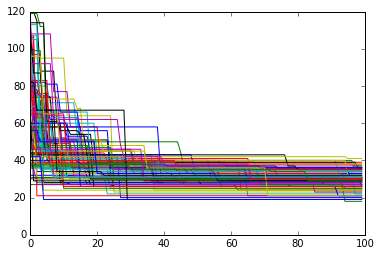

In [26]:
graph = {0: [5, 2, 8, 6, 4, 1], 1: [3, 9, 4, 7, 8, 0], 2: [6, 0, 3, 8, 7, 9],
         3: [8, 1, 7, 6, 9, 2], 4: [8, 9, 1, 7, 0], 5: [6, 0, 7, 9],
         6: [2, 5, 3, 8, 0, 7], 7: [3, 9, 1, 2, 5, 4, 6], 8: [3, 0, 4, 1, 6, 2, 9], 9: [1, 4, 7, 3, 2, 5, 8]}
infected = {3, 4, 7}
removed = set()
B = 16
edges = [(2, 6), (5, 6), (3, 8), (0, 5), (0, 2), (1, 3), (3, 7), (1, 9), (0, 8), (4, 8),
         (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3),
         (2, 8), (2, 7), (5, 7), (2, 9), (5, 9), (8, 9), (4, 7), (6, 7), (0, 4), (0, 1)]


# random edge
def randomEdges(n, edges):
	return random.sample(edges, n)

#susceptible count: neighbour and its neighbours
def susCounter(graph, infected):
	inf = list(infected)
	gf = list(graph)
	susReturn = 0

	for i in xrange(0, len(inf)):
		susReturn += len(graph[inf[i]])
		# len(graph[inf[i]]) : Neighbours of infected node
		for j in xrange(0, len(graph[inf[i]])):
			#trace on each neighbour for add # Of them
			checker = graph[inf[i]][j]
			susReturn += len(graph[checker])

	return susReturn

def fitness(graph, removed, infected):
	inpGraph = list(graph.values())
	inpRemoved = list(removed)
	inpInfected = list(infected)

	for x in inpRemoved: #removed is as [(2,3),...]
		u , v = x
		inpGraph[u].pop(inpGraph[u].index(v)) # delete from sample grath
		inpGraph[v].pop(inpGraph[v].index(u))

	sus = susCounter(inpGraph, inpInfected)

	for x in inpRemoved: # add edges back in sample graph
		u, v = x
		inpGraph[u].append(v)
		inpGraph[v].append(u)
	
	return sus
	

isremoved = set() #set to be removed

for i in range(100):#different sets
	print('############    THIS IS THE ' + str(i) + 'th SET ATTEMPT    ############')

	randEdge = randomEdges(random.randrange(1, B+1), edges) #initial in-set
	removed = {i for i in randEdge}
	best = fitness(graph, removed, infected)
	rbest = len(removed) #removed best lengh
	lfit = []

	print('----> INITIAL BEST FITNESS IS: ' + str(best))

	for j in range(100):#in set
		print('######    THIS IS THE ' + str(j) + 'th ATTEMPT    ######')

		p = random.choice([0,1]) # one of two: add / delete

		if p:
			if B < len(edges):
				added = randomEdges(random.randrange(1,B+1),edges)
				isremoved = {e for e in added}
				recbest = fitness(graph, isremoved, infected)
				rrecbest = len(isremoved)

				if recbest < best: # less is better
					best = recbest
					removed = isremoved

				if  recbest == best: # equal

					if rrecbest < rbest: # less lengh
						removed = isremoved

					if rrecbest == rbest:
						pr = random.choice([0,1]) # random choice between removed
						if pr:
							removed = isremoved

		if not p:

			if len(removed)>0:
				lremoved = random.sample(removed, random.randint(1,len(removed))) # choose some from already removed
				recbest = fitness(graph, lremoved, infected)
				rrecbest = len(lremoved)

				if recbest <= best:
					best = recbest
					removed = lremoved
                    
		print('----> CURRENT BEST FITNESS IS: ' + str(best))
		lfit.append(best)

	plt.plot(range(len(lfit)),lfit)


# SA Algorithm

The only difference between this algorithm and hill climbing is that it uses a probability which decreases in time and will initially let the algorithm to choose more between bad fitnesses as well and that includes in both, removing from current removed edges and adding another set of removed edges.

In the end for every set the shema is ploted.

############    THIS IS THE 0th SET ATTEMPT    ############
----> INITIAL bestST FITNESS IS: 70
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 76
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 76
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 76
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 76
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 60
######    THIS IS THE 11th ATTEMPT    ######


######    THIS IS THE 89th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 90th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 91th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 92th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 93th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 94th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 95th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 96th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 97th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
############    THIS IS THE 3th SET ATTEMPT    ############
----> INITIAL bestST FITNESS IS: 37
######    THIS IS THE 0th ATTEMPT  

############    THIS IS THE 7th SET ATTEMPT    ############
----> INITIAL bestST FITNESS IS: 25
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 11th ATTEMPT    ######


######    THIS IS THE 24th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 25th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 26th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 27th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 28th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 29th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 30th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 31th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 32th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 33th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 34th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 35th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 36th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 77th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 78th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 79th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 80th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 81th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 82th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 83th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 84th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 85th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 86th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 87th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS 

----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 54th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 55th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 56th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 57th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 58th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 59th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 60th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 25
######    THIS IS 

######    THIS IS THE 29th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 30th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 31th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 32th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 33th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 34th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 35th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 36th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 37th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 38th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 39th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 40th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 41th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 41
######    THIS IS THE 56th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 41
######    THIS IS THE 57th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 41
######    THIS IS THE 58th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 59th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 60th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 67th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS 

----> CURRENT BEST FITNESS IS: 23
######    THIS IS THE 96th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 23
######    THIS IS THE 97th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 23
######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 23
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 23
############    THIS IS THE 30th SET ATTEMPT    ############
----> INITIAL bestST FITNESS IS: 117
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 126
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
#####

----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 69th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 73th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 74th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 75th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 77th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 78th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 79th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 80th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS 

----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 75th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 77th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 78th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 79th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 80th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 81th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 82th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 83th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 84th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 85th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 86th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS 

######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 67th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 68th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 69th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 73th ATTEMPT    ######
----> C

######    THIS IS THE 17th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 18th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 19th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 20th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 21th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 22th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 23th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 24th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 25th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 26th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 27th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 28th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 45
######    THIS IS THE 29th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 97
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 97
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 97
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 73
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 70
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 70
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 11th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 12th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 35
######    THIS IS THE 13th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 14th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 34
######    THIS IS THE 15t

----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 67th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 68th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 69th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 73th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 74th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 75th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS THE 76th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 30
######    THIS IS 

----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 95th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 96th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 97th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 26
############    THIS IS THE 55th SET ATTEMPT    ############
----> INITIAL bestST FITNESS IS: 64
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 84
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 84
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 84
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 53
######

----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 40th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 41th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 42th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 43th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 44th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 45th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 46th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 47th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 48th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 49th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 50th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS THE 51th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 32
######    THIS IS 

----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 41th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 42th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 43th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 44th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 45th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 46th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 47th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 48th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 49th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 50th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 51th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS THE 52th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 29
######    THIS IS 

----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 12th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 13th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 14th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 15th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 16th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 17th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 18th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 19th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 20th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 21th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 22th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS THE 23th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 38
######    THIS IS 

######    THIS IS THE 55th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 56th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 57th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 58th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 59th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 60th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 19
######    THIS IS THE 67th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 75
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 75
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 75
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 75
######    THIS IS THE 11th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS THE 12th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS THE 13th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS THE 14th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS THE 15th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS THE 16th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS THE 17th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS THE 18th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS THE 19th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 44
######    THIS IS TH

############    THIS IS THE 79th SET ATTEMPT    ############
----> INITIAL bestST FITNESS IS: 47
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 83
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 83
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 83
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 83
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 57
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 57
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 57
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 57
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 57
######    THIS IS THE 9th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 57
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 57
######    THIS IS THE 11th ATTEMPT    ######

----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 67th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 68th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 69th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 36
######    THIS IS 

######    THIS IS THE 61th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 62th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 63th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 64th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 65th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 66th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 67th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 68th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 69th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 70th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 71th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 72th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 73th ATTEMPT    ######
----> C

----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 92th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 93th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 94th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 95th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 96th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 97th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
############    THIS IS THE 91th SET ATTEMPT    ############
----> INITIAL bestST FITNESS IS: 47
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 62
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 62
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 62
###

----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 10th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 11th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 12th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 13th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 14th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 33
######    THIS IS THE 15th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 16th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 17th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 18th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 19th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 20th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 21th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS 

######    THIS IS THE 98th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
######    THIS IS THE 99th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 28
############    THIS IS THE 99th SET ATTEMPT    ############
----> INITIAL bestST FITNESS IS: 57
######    THIS IS THE 0th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 62
######    THIS IS THE 1th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 62
######    THIS IS THE 2th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 62
######    THIS IS THE 3th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 62
######    THIS IS THE 4th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 62
######    THIS IS THE 5th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 6th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 7th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 8th ATTEMPT    ######
----> CURRENT BEST FITNESS IS: 39
######    THIS IS THE 9th ATTEMPT    ######

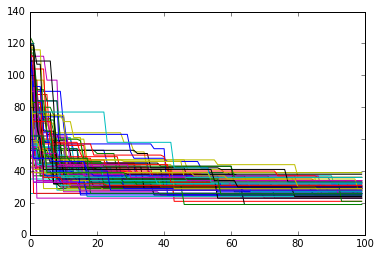

In [29]:
graph = {0: [5, 2, 8, 6, 4, 1], 1: [3, 9, 4, 7, 8, 0], 2: [6, 0, 3, 8, 7, 9],
         3: [8, 1, 7, 6, 9, 2], 4: [8, 9, 1, 7, 0], 5: [6, 0, 7, 9],
         6: [2, 5, 3, 8, 0, 7], 7: [3, 9, 1, 2, 5, 4, 6], 8: [3, 0, 4, 1, 6, 2, 9], 9: [1, 4, 7, 3, 2, 5, 8]}
infected = {3, 4, 7}
removed = set()
B = 16
edges = [(2, 6), (5, 6), (3, 8), (0, 5), (0, 2), (1, 3), (3, 7), (1, 9), (0, 8), (4, 8),
         (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3),
         (2, 8), (2, 7), (5, 7), (2, 9), (5, 9), (8, 9), (4, 7), (6, 7), (0, 4), (0, 1)]


def randomEdges(n, edges):
	return random.sample(edges, n)


def susCounter(graph, infected):
	inf = list(infected)
	gf = list(graph)
	susReturn = 0
	
	for i in xrange(0, len(inf)):
		susReturn += len(graph[inf[i]])
		for j in xrange(0, len(graph[inf[i]])):
			checker = graph[inf[i]][j]
			susReturn += len(graph[checker])
	return susReturn


def fitness(graph, removed, infected):
	inpGraph = list(graph.values())
	inpRemoved = list(removed)
	inpInfected = list(infected)

	for x in inpRemoved:
		u , v = x
		inpGraph[u].pop(inpGraph[u].index(v))
		inpGraph[v].pop(inpGraph[v].index(u))

	sus = susCounter(inpGraph, inpInfected)

	for x in inpRemoved:
		u, v = x
		inpGraph[u].append(v)
		inpGraph[v].append(u)
	
	return sus
	

isremoved = set()

for i in range(100):
	print('############    THIS IS THE ' + str(i) + 'th SET ATTEMPT    ############')

	randEdge = randomEdges(random.randrange(1, B+1), edges)
	removed = {i for i in randEdge}
	best = fitness(graph, removed, infected)
	rbest = len(removed)
	lfit = []

	print('----> INITIAL bestST FITNESS IS: ' + str(best))

	for j in range(100):#in set
		print('######    THIS IS THE ' + str(j) + 'th ATTEMPT    ######')
		
		prob = 1/(j+1) # SA probability
		p = random.choice([0,1])

		if p:
			if B < len(edges):
				added = randomEdges(random.randrange(1,B+1),edges)
				isremoved = {e for e in added}

				recbest = fitness(graph, isremoved, infected)
				rrecbest = len(isremoved)

				if recbest > best and random.random() < prob: # first accept more worst case senarios
					best = recbest
					removed = isremoved

				elif recbest < best:
					best = recbest
					removed = isremoved

				elif  recbest == best:

					if rrecbest < rbest:
						removed = isremoved

					if rrecbest == rbest:
						pr = random.choice([0,1])
						if pr:
							removed = isremoved

		if not p:

			if len(removed)>0:
				lremoved = random.sample(removed, random.randint(1,len(removed)))
				recbest = fitness(graph, lremoved, infected)
				rrecbest = len(lremoved)

				if recbest > best and random.random() < prob: # first accept more worst case senarios
					best = recbest
					removed = isremoved

				elif recbest <= best:
					best = recbest
					removed = lremoved
                    
		print('----> CURRENT BEST FITNESS IS: ' + str(best))
		lfit.append(best)

	plt.plot(range(len(lfit)),lfit)



Both of the above algorithms finish in about the same fitness but it is observable that SA chooses more worse fitnesses at the begining

# Genetic Algorithm

First I generate a population of sets of removed edges of size "B", then I would choose two sets of removed edges from population created as parents and then cross them to get a child which is by generating a random cross position and crossing the parents, then I would mutate a child by removing a candidate edge which is a random edge and replacing it with another edge and then add it to the generation, which is sorted by the "fitList" function, or replace it with the last person in population who has a worse fitness.

In the end the shema is ploted.

([(0, 8), (0, 5), (2, 9), (0, 6), (6, 8)], 113)
([(1, 9), (0, 5), (0, 6), (0, 8), (2, 9)], 111)
([(2, 9), (0, 6), (5, 6), (0, 5)], 117)
([(0, 2), (2, 8), (0, 1), (0, 6), (0, 5)], 114)
([(0, 5), (1, 9), (0, 1), (0, 6)], 115)
([(6, 8), (5, 9), (2, 6), (0, 5)], 116)
([(0, 8), (2, 8), (0, 2)], 120)
([(0, 2), (5, 6), (2, 8), (0, 8), (2, 6)], 113)
([(0, 5), (0, 8), (0, 4), (5, 6), (8, 9), (0, 2), (5, 7)], 104)
([(0, 5), (5, 9), (4, 9), (0, 8), (0, 6)], 108)


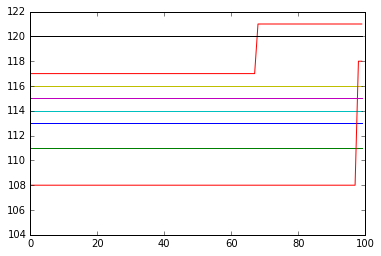

In [64]:
graph = {0: [5, 2, 8, 6, 4, 1], 1: [3, 9, 4, 7, 8, 0], 2: [6, 0, 3, 8, 7, 9],
         3: [8, 1, 7, 6, 9, 2], 4: [8, 9, 1, 7, 0], 5: [6, 0, 7, 9],
         6: [2, 5, 3, 8, 0, 7], 7: [3, 9, 1, 2, 5, 4, 6], 8: [3, 0, 4, 1, 6, 2, 9], 9: [1, 4, 7, 3, 2, 5, 8]}
infected = {3, 4, 7}
removed = set()
B = 16
edges = [(2, 6), (5, 6), (3, 8), (0, 5), (0, 2), (1, 3), (3, 7), (1, 9), (0, 8), (4, 8),
         (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3),
         (2, 8), (2, 7), (5, 7), (2, 9), (5, 9), (8, 9), (4, 7), (6, 7), (0, 4), (0, 1)]


def randomEdges(n, edges): #added some check for sampling problem: negetive or positive range
	if n <= len(edges):
		e = random.sample(edges, n)
	else:
		while n > len(edges):
			n -= 1
		e = random.sample(edges, n)

	return e #list


def susCounter(graph, infected):
	inf = list(infected)
	susReturn = 0

	for i in xrange(0, len(inf)):
		susReturn += len(graph[inf[i]])
		for j in xrange(0, len(graph[inf[i]])):
			checker = graph[inf[i]][j]
			susReturn += len(graph[checker])

	return susReturn #number


def fitness(graph, removed, infected): # handeling single and multiple edges removed
	inpGraph = list(graph.values())
	inpRemoved = list(removed)

	if len(removed) == 1: #[(1,2)]
		u , v = removed
		inpGraph[u].pop(inpGraph[u].index(v))
		inpGraph[v].pop(inpGraph[v].index(u))

		sus = susCounter(inpGraph, infected)

		inpGraph[u].append(v)
		inpGraph[v].append(u)

	else:
		for x in inpRemoved:#[(1,2),(2,3),...]
			u , v = x
			inpGraph[u].pop(inpGraph[u].index(v))
			inpGraph[v].pop(inpGraph[v].index(u))
		
		sus = susCounter(inpGraph, infected)

		for x in inpRemoved:
			u, v = x
			inpGraph[u].append(v)
			inpGraph[v].append(u)
	
	return sus #number


def population(n, B, edges):
	popList = []

	for i in range(n):
		popList.append(randomEdges(B, edges)) # population of removed's'

	return popList #[[edges],[]]


def cross(p1, p2):
    crossLen = random.choice(range(len(p1[0]))) # random cross point
    if crossLen == 0:
		crossLen += 1
    
    t = randomEdges(crossLen, p1[0])
    s = randomEdges(len(p1[0])-crossLen, p2[0])

    for i in range(len(s)):
        if s[i] not in t :
            t.append(s[i])
        
    while len(p1) > len(t) :
        ch = randomEdges(1, p1[0])
        while ch in t :
            ch = randomEdges(1, p1[0])
        t.append(ch)

    return t


def mutate(child, i, edges):
	muteCandidate = random.choice(range(len(child))) #candidate to mutate
	muteProb = random.random() # mutate probability

	if muteProb < (1/(i+10)):
		child.pop(muteCandidate) #drops the child
        mutated = randomEdges(1, edges)

        while mutated[0] in child:
            mutated = randomEdges(1, edges)    
		
        child.extend(mutated) #adds instead

	return child


def fitList(population): # list of fitness of population and sorting
	fitValues = []
	fitPop = []

	for i in range(len(population)):
		fit = fitness(graph, population[i], infected)
		fitValues.append(fit)
		fitPop.append(population[i])

		for j in range(len(fitValues)):
			if fit > fitValues[len(fitValues)-j-1]:
				temp = fitValues[len(fitValues)-j-1]
				temp1 = fitPop[len(fitPop)-j-1]

				fitValues[len(fitValues)-j-1] = fit
				fitPop[len(fitPop)-j-1] = population[i]

				fit = temp
				population[i] = temp1

	return fitPop, fitValues


def generation(child, population, popNum):
    childFit = fitness(graph, child, infected)
    pplList , value = fitList(population)

    if len(pplList) < popNum:
        pplList.append(child)

    elif childFit > value[len(value)-1]: #else if list equal num -and- was a better child
        if len(population)>1:
            population.pop(len(pplList)-1)
            population.append(child)
            pplList = population

    return pplList

for it in range(10):
    ppl = population(100, B, edges)
    ppls = []
    for i in range(100):
        p1 = random.sample(ppl,1)#[[(edges)]]
        p2 = random.sample(ppl,1) 
        child = cross(p1,p2)
        mutateChild = mutate(child, i, edges)
        ppls = generation(mutateChild, ppl, len(ppl))
        ppl = ppls

    pplList , value = fitList(ppl)
    print(pplList[0], value[0])
    plt.plot(range(len(value)), value)

As shown in the results the shema above is reversed so the algorithm starts at a bad point and ends with better fitnesses.

compared to last algorithms genetic doesnt do so much good in this problem and that's because of the mutation rate if we let more dramatic changes in the new generation happen then it will get better.

# Ant Colony Algorithm

I have a number of ants, first off I use an ant so I have a path that contains my removed edges and I will calculate the fremon and add it to each edge in my path and continue to do so for the rest of the ants.

([(0, 4), (0, 2), (1, 7), (0, 2), (0, 6), (0, 2), (1, 9), (2, 9), (0, 8), (6, 7), (3, 6), (0, 8), (0, 6), (6, 8), (0, 1), (1, 7)], 76)
([(2, 9), (4, 7), (0, 6), (3, 6), (2, 6), (4, 9), (0, 8), (2, 7), (1, 3), (0, 4), (5, 7), (1, 9), (0, 1), (2, 9), (1, 8), (2, 6)], 46)
([(4, 9), (7, 9), (2, 6), (0, 8), (0, 1), (2, 9), (8, 9), (2, 6), (6, 8), (1, 8), (3, 7), (0, 5), (3, 7), (0, 2), (2, 9), (2, 6)], 63)
([(6, 8), (0, 2), (5, 6), (2, 3), (6, 8), (4, 9), (1, 8), (1, 4), (0, 8), (0, 2), (8, 9), (1, 8), (5, 9), (2, 9), (3, 7), (5, 7)], 55)
([(1, 7), (3, 7), (4, 8), (1, 9), (5, 6), (4, 8), (0, 5), (0, 1), (2, 3), (1, 9), (3, 6), (7, 9), (3, 8), (3, 7), (3, 7), (0, 2)], 47)
([(2, 3), (2, 6), (2, 8), (2, 3), (5, 9), (0, 8), (5, 6), (0, 2), (3, 6), (5, 9), (3, 6), (0, 5), (2, 7), (0, 2), (5, 9), (2, 8)], 89)
([(0, 6), (2, 3), (1, 3), (4, 8), (6, 7), (1, 9), (8, 9), (6, 8), (0, 1), (6, 8), (3, 6), (4, 8), (3, 6), (1, 7), (0, 1), (3, 6)], 63)
([(4, 7), (0, 8), (4, 7), (1, 4), (1, 3), (0, 2), (1, 3

([(5, 6), (0, 1), (0, 1), (2, 6), (6, 8), (6, 8), (3, 6), (0, 6), (5, 7), (1, 3), (4, 9), (3, 9), (0, 5), (5, 6), (5, 6), (1, 7)], 63)
([(4, 7), (3, 7), (2, 6), (3, 7), (2, 7), (6, 7), (6, 7), (0, 4), (2, 7), (1, 3), (6, 7), (6, 8), (4, 8), (2, 6), (3, 8), (4, 8)], 50)
([(2, 9), (5, 6), (1, 4), (4, 7), (5, 6), (2, 9), (2, 9), (5, 7), (5, 9), (2, 6), (1, 4), (3, 7), (6, 8), (2, 8), (0, 8), (0, 6)], 59)
([(5, 6), (2, 6), (6, 7), (2, 6), (5, 9), (0, 4), (0, 4), (3, 6), (3, 8), (2, 9), (4, 9), (2, 3), (1, 9), (0, 2), (4, 9), (1, 4)], 52)
([(2, 8), (2, 7), (3, 8), (3, 9), (1, 4), (3, 6), (3, 9), (6, 8), (1, 9), (1, 8), (0, 5), (7, 9), (1, 8), (2, 7), (1, 9), (0, 8)], 56)
([(0, 8), (6, 8), (0, 1), (1, 3), (2, 6), (0, 1), (5, 9), (4, 7), (0, 8), (4, 7), (5, 9), (3, 6), (4, 8), (4, 7), (4, 8), (4, 8)], 73)
([(5, 6), (5, 9), (1, 4), (1, 8), (2, 6), (1, 7), (4, 8), (2, 7), (0, 2), (5, 9), (2, 8), (6, 7), (0, 2), (2, 3), (2, 9), (0, 2)], 60)
([(6, 8), (1, 7), (1, 3), (0, 4), (0, 6), (3, 9), (2, 9

([(2, 7), (1, 3), (0, 8), (6, 7), (1, 4), (8, 9), (6, 7), (2, 9), (2, 3), (4, 8), (3, 9), (0, 4), (3, 7), (5, 6), (6, 7), (6, 7)], 37)
([(7, 9), (5, 7), (0, 2), (3, 7), (1, 7), (5, 6), (0, 8), (1, 9), (2, 3), (4, 9), (3, 8), (2, 3), (6, 8), (3, 8), (0, 1), (5, 6)], 46)
([(3, 6), (5, 7), (2, 9), (1, 8), (8, 9), (4, 9), (1, 7), (2, 6), (3, 7), (1, 3), (7, 9), (0, 2), (1, 4), (5, 7), (1, 7), (1, 3)], 43)
([(5, 6), (3, 6), (1, 3), (3, 8), (2, 9), (0, 6), (0, 8), (6, 7), (3, 9), (5, 7), (3, 9), (1, 3), (7, 9), (6, 7), (0, 6), (4, 9)], 53)
([(0, 6), (2, 8), (5, 6), (0, 6), (6, 7), (6, 8), (3, 8), (5, 9), (0, 6), (3, 9), (0, 8), (0, 6), (1, 4), (0, 5), (3, 6), (8, 9)], 66)
([(3, 8), (0, 8), (2, 9), (2, 6), (6, 8), (3, 9), (3, 8), (0, 2), (2, 9), (2, 7), (2, 8), (5, 7), (4, 9), (1, 3), (2, 3), (3, 8)], 56)
([(2, 3), (1, 8), (2, 8), (5, 6), (2, 8), (6, 7), (0, 4), (0, 1), (1, 4), (0, 5), (3, 8), (5, 7), (1, 4), (0, 1), (2, 9), (6, 7)], 64)
([(0, 2), (6, 8), (8, 9), (0, 2), (1, 9), (2, 6), (1, 7

([(1, 4), (0, 6), (0, 5), (3, 9), (0, 6), (3, 9), (5, 7), (5, 6), (1, 4), (8, 9), (3, 6), (2, 7), (2, 3), (0, 5), (0, 4), (0, 6)], 62)
([(2, 9), (0, 1), (1, 7), (1, 8), (6, 7), (4, 9), (0, 1), (3, 7), (6, 7), (7, 9), (1, 8), (3, 6), (3, 8), (4, 7), (1, 9), (2, 3)], 32)
([(1, 8), (5, 9), (0, 6), (0, 8), (0, 2), (0, 2), (1, 3), (0, 2), (2, 3), (0, 5), (2, 6), (6, 7), (6, 8), (0, 4), (1, 7), (6, 7)], 67)
([(6, 7), (2, 3), (0, 8), (3, 6), (4, 8), (3, 9), (5, 9), (1, 9), (2, 7), (1, 7), (6, 7), (6, 7), (5, 9), (1, 3), (5, 7), (1, 7)], 42)
([(8, 9), (1, 9), (6, 7), (0, 8), (2, 8), (2, 7), (1, 4), (0, 2), (1, 9), (4, 9), (0, 4), (5, 7), (5, 6), (1, 8), (3, 9), (4, 9)], 48)
([(2, 8), (2, 6), (6, 8), (6, 7), (5, 7), (8, 9), (7, 9), (0, 8), (2, 3), (0, 4), (1, 8), (0, 2), (2, 6), (5, 7), (5, 6), (0, 4)], 63)
([(0, 5), (2, 7), (5, 6), (8, 9), (5, 7), (3, 7), (2, 6), (3, 6), (5, 7), (5, 9), (4, 9), (2, 3), (2, 9), (0, 1), (4, 7), (0, 6)], 47)
([(8, 9), (5, 7), (6, 7), (3, 8), (2, 8), (3, 7), (1, 3

([(3, 6), (3, 6), (2, 8), (3, 6), (0, 4), (3, 8), (4, 8), (6, 7), (1, 7), (3, 9), (6, 8), (6, 8), (8, 9), (6, 7), (7, 9), (7, 9)], 52)
([(3, 9), (4, 9), (6, 7), (4, 8), (4, 7), (3, 7), (8, 9), (0, 8), (5, 6), (3, 6), (3, 9), (1, 8), (4, 9), (0, 1), (4, 8), (3, 6)], 47)
([(0, 5), (0, 6), (2, 9), (8, 9), (2, 3), (0, 2), (4, 9), (4, 7), (2, 6), (2, 6), (3, 7), (7, 9), (2, 6), (3, 7), (3, 9), (0, 1)], 52)
([(2, 7), (5, 7), (3, 8), (1, 3), (2, 8), (4, 8), (1, 9), (2, 8), (2, 6), (0, 5), (0, 4), (0, 8), (2, 7), (5, 6), (4, 8), (1, 8)], 64)
([(1, 9), (0, 5), (6, 7), (0, 8), (2, 3), (3, 6), (1, 3), (8, 9), (5, 7), (2, 8), (4, 7), (5, 6), (5, 6), (4, 7), (0, 8), (8, 9)], 57)
([(3, 8), (5, 7), (6, 7), (4, 8), (1, 8), (5, 6), (2, 9), (4, 7), (0, 5), (7, 9), (1, 8), (1, 4), (2, 8), (2, 9), (5, 9), (6, 8)], 50)
([(2, 6), (8, 9), (5, 7), (7, 9), (3, 8), (4, 8), (1, 3), (2, 8), (2, 3), (2, 3), (2, 3), (0, 4), (6, 8), (3, 9), (2, 8), (5, 6)], 48)
([(1, 7), (5, 6), (1, 3), (7, 9), (2, 3), (3, 9), (0, 6

([(7, 9), (6, 7), (1, 9), (8, 9), (6, 7), (2, 3), (3, 8), (0, 1), (1, 4), (1, 9), (1, 4), (8, 9), (4, 7), (2, 3), (5, 7), (3, 7)], 42)
([(0, 4), (5, 6), (6, 8), (0, 8), (2, 8), (0, 6), (1, 9), (0, 5), (5, 6), (2, 9), (6, 8), (0, 1), (0, 6), (2, 6), (3, 8), (5, 9)], 77)
([(3, 8), (1, 3), (5, 6), (3, 9), (2, 9), (1, 9), (3, 8), (0, 8), (2, 3), (5, 6), (1, 9), (5, 7), (5, 7), (0, 4), (5, 6), (0, 8)], 65)
([(1, 8), (1, 3), (4, 8), (1, 4), (1, 9), (7, 9), (0, 1), (5, 7), (1, 8), (5, 6), (3, 7), (0, 8), (4, 7), (0, 5), (6, 7), (0, 6)], 40)
([(1, 4), (1, 7), (0, 6), (5, 7), (4, 9), (3, 7), (1, 8), (2, 3), (4, 8), (1, 9), (6, 8), (6, 8), (0, 1), (1, 3), (3, 8), (2, 7)], 34)
([(2, 9), (5, 7), (1, 8), (4, 8), (1, 9), (6, 8), (4, 8), (3, 8), (6, 8), (4, 7), (5, 7), (6, 8), (2, 6), (0, 4), (8, 9), (2, 3)], 55)
([(3, 8), (4, 7), (2, 8), (6, 8), (0, 8), (0, 1), (0, 4), (4, 8), (2, 6), (0, 6), (5, 7), (1, 8), (1, 7), (2, 6), (0, 8), (1, 4)], 56)
([(4, 8), (0, 5), (0, 2), (3, 8), (2, 3), (3, 6), (2, 9

([(1, 9), (2, 9), (2, 3), (1, 3), (3, 8), (5, 6), (3, 7), (5, 7), (7, 9), (1, 7), (2, 9), (4, 8), (8, 9), (1, 7), (2, 7), (3, 7)], 39)
([(5, 7), (0, 4), (0, 2), (3, 7), (2, 6), (4, 8), (2, 8), (7, 9), (4, 7), (0, 8), (5, 6), (3, 6), (2, 7), (6, 8), (3, 6), (0, 1)], 42)
([(1, 7), (2, 3), (3, 6), (1, 8), (5, 6), (8, 9), (1, 4), (0, 1), (3, 8), (1, 4), (0, 6), (2, 3), (1, 9), (2, 6), (2, 3), (1, 4)], 65)
([(4, 8), (1, 3), (1, 4), (3, 8), (2, 6), (1, 4), (5, 7), (0, 8), (4, 8), (8, 9), (2, 9), (1, 8), (2, 9), (0, 5), (2, 8), (2, 7)], 63)
([(0, 5), (3, 6), (2, 6), (3, 9), (4, 7), (0, 2), (0, 8), (5, 7), (3, 8), (0, 8), (0, 2), (1, 3), (2, 9), (0, 4), (4, 7), (1, 7)], 44)
([(1, 4), (3, 8), (6, 8), (5, 6), (4, 9), (3, 6), (1, 8), (1, 4), (4, 7), (0, 1), (6, 8), (0, 6), (2, 9), (0, 8), (0, 5), (1, 8)], 57)
([(2, 8), (6, 7), (0, 1), (3, 6), (1, 9), (1, 9), (5, 9), (0, 5), (1, 3), (0, 5), (1, 8), (2, 3), (0, 6), (4, 8), (8, 9), (5, 6)], 59)
([(3, 9), (1, 4), (4, 9), (3, 6), (6, 8), (0, 2), (4, 9

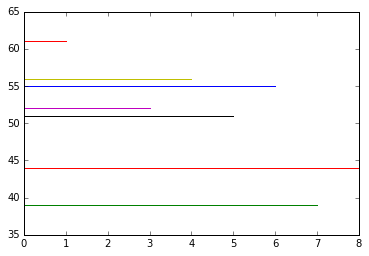

In [67]:
graph = {0: [5, 2, 8, 6, 4, 1], 1: [3, 9, 4, 7, 8, 0], 2: [6, 0, 3, 8, 7, 9],
         3: [8, 1, 7, 6, 9, 2], 4: [8, 9, 1, 7, 0], 5: [6, 0, 7, 9],
         6: [2, 5, 3, 8, 0, 7], 7: [3, 9, 1, 2, 5, 4, 6], 8: [3, 0, 4, 1, 6, 2, 9], 9: [1, 4, 7, 3, 2, 5, 8]}
infected = {3, 4, 7}
removed = set()
B = 16
edges = [(2, 6), (5, 6), (3, 8), (0, 5), (0, 2), (1, 3), (3, 7), (1, 9), (0, 8), (4, 8),
         (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3),
         (2, 8), (2, 7), (5, 7), (2, 9), (5, 9), (8, 9), (4, 7), (6, 7), (0, 4), (0, 1)]



def randomEdges(n, edges):
	if n <= len(edges):
		e = random.sample(edges, n)
	else:
		while n > len(edges):
			n -= 1
		e = random.sample(edges, n)

	return e #list


def susCounter(graph, infected):
	inf = list(infected)
	gf = list(graph)
	susReturn = 0

	for i in xrange(0, len(inf)):
		susReturn += len(graph[inf[i]])
		for j in xrange(0, len(graph[inf[i]])):
			checker = graph[inf[i]][j]
			susReturn += len(graph[checker])

	return susReturn


def fitness(graph, removed, infected):
	inpGraph = copy(list(graph.values()))
	inpRemoved = list(set(removed))
	inpInfected = list(infected)

	for x in inpRemoved:
		u , v = x
		inpGraph[u].pop(inpGraph[u].index(v))
		inpGraph[v].pop(inpGraph[v].index(u))

	sus = susCounter(inpGraph, inpInfected)

	for x in inpRemoved:
		u, v = x
		inpGraph[u].append(v)
		inpGraph[v].append(u)

	return sus

scoreList = [0 for i in range(len(edges))]

def scoredList(graph, removed, infected):
	score = fitness(graph, removed, infected)

	for e in removed: #score as fremon
		esm = edges.index(e)
		scoreList[esm] += score

	return


for i in range(100):
	path = randomEdges(B,edges)
	scoredList(graph, path, infected)

sumation = sum(scoreList)
namak = []

for j in range(10):
	for i in range(100):
		while len(namak) < B:
			path = random.sample(edges,1)
			index = edges.index(path[0])

			if float(sumation) == 0:
				sumation += 1
			if float(scoreList[index])/float(sumation) < random.random():
				namak.extend(path)

		scoredList(graph, namak, infected)
		f = fitness(graph, namak, infected)
		print(namak, f)
		namak = []

	plt.plot(range(j),[f for i in range(j)])



In the shema above I wanted to show that each ant will gradually make the total fitness better than it first started.

Observing the ants movement it is obvious that with an initial score and gradually improving it the problem responds better but may not end in it's best position. Compared to hill and SA this algorithm still ends with a worse fitness that may get better by different scores but let's not forget that the ants wont always choose the best posible way and may have some errors because of the fremon disappearing

# PSO Algorithm

For an amount of times, each time for a particle which consists of sets of removed edges I will calculate a score. Then I would start off calculating c and r as my weights for the algorithm and multiply it to the difference between current group best and local best and the last score of each, not to forget each individual velocity. And then each time set the best personal fitness as the global fitness.

('s', [(3, 7), (8, 9), (2, 6), (7, 9), (4, 9)])
('g', [(0, 2), (1, 8), (0, 1), (3, 9), (3, 8)])
('v', [(8, 9), (3, 7), (6, 8), (1, 8), (2, 7)])
[(0, 1), (3, 8), (2, 6), (4, 9), (6, 8), (2, 7), (8, 9), (1, 8), (3, 9), (1, 7), (3, 7), (0, 2), (7, 9), (0, 2), (3, 6), (2, 6)]
('s', [(1, 4), (5, 7), (3, 7), (0, 2), (4, 9)])
('g', [(0, 1), (2, 7), (1, 7), (3, 7), (3, 8)])
('v', [(2, 9), (7, 9), (8, 9), (6, 8), (5, 6)])
[(0, 1), (2, 7), (4, 9), (6, 8), (2, 9), (5, 6), (5, 7), (1, 4), (3, 8), (1, 7), (3, 7), (8, 9), (0, 2), (7, 9), (1, 4), (5, 7)]
('s', [(5, 6), (5, 7), (7, 9), (2, 8), (3, 8)])
('g', [(1, 7), (1, 8), (2, 7), (3, 6), (8, 9)])
('v', [(5, 9), (1, 9), (2, 9), (5, 7), (0, 2)])
[(2, 7), (8, 9), (2, 9), (5, 9), (5, 6), (2, 8), (5, 7), (3, 8), (1, 8), (1, 9), (3, 6), (1, 7), (0, 2), (7, 9), (0, 2), (7, 9)]
('s', [(3, 6), (3, 7), (0, 2), (2, 8), (0, 8)])
('g', [(0, 2), (0, 1), (6, 8), (2, 6), (2, 7)])
('v', [(5, 6), (4, 8), (0, 4), (7, 9), (1, 3)])
[(0, 1), (2, 7), (2, 6), (6, 8), (4, 

('s', [(8, 9), (5, 6), (2, 8), (1, 7), (0, 2)])
('g', [(3, 7), (3, 6), (5, 6), (5, 9), (1, 7)])
('v', [(3, 7), (1, 7), (6, 7), (5, 6), (4, 9)])
[(5, 9), (6, 7), (5, 6), (2, 8), (8, 9), (3, 6), (1, 7), (3, 7), (4, 9), (0, 2), (3, 8), (4, 9), (5, 9), (3, 6), (2, 8), (7, 9)]
('s', [(0, 8), (8, 9), (5, 6), (3, 8), (5, 9)])
('g', [(2, 9), (4, 7), (5, 9), (6, 7), (1, 7)])
('v', [(1, 4), (5, 7), (2, 9), (3, 6), (8, 9)])
[(3, 8), (4, 7), (6, 7), (2, 9), (5, 9), (5, 6), (5, 7), (1, 4), (8, 9), (3, 6), (1, 7), (4, 9), (0, 8), (2, 6), (4, 7), (3, 8)]
('s', [(0, 2), (8, 9), (3, 6), (0, 8), (4, 7)])
('g', [(3, 6), (5, 9), (6, 7), (5, 9), (1, 4)])
('v', [(1, 7), (3, 6), (7, 9), (0, 2), (2, 9)])
[(5, 9), (4, 7), (6, 7), (2, 9), (5, 7), (1, 4), (8, 9), (3, 6), (1, 7), (0, 8), (0, 2), (7, 9), (3, 6), (0, 8), (3, 7), (1, 7)]
('s', [(7, 9), (5, 9), (3, 7), (4, 9), (5, 6)])
('g', [(7, 9), (3, 8), (3, 7), (1, 7), (5, 9)])
('v', [(1, 8), (0, 5), (2, 9), (0, 6), (2, 7)])
[(2, 7), (5, 9), (4, 9), (2, 9), (5, 

('s', [(4, 9), (8, 9), (3, 8), (1, 9), (5, 6)])
('g', [(1, 3), (2, 6), (4, 8), (2, 8), (4, 7)])
('v', [(2, 8), (0, 1), (2, 3), (4, 9), (0, 5)])
[(0, 1), (3, 8), (4, 7), (1, 3), (4, 9), (4, 8), (5, 6), (2, 8), (8, 9), (2, 6), (2, 3), (1, 9), (3, 6), (0, 5), (7, 9), (1, 4)]
('s', [(7, 9), (8, 9), (1, 3), (4, 7), (1, 9)])
('g', [(0, 6), (7, 9), (1, 3), (8, 9), (3, 7)])
('v', [(2, 3), (5, 7), (3, 6), (6, 7), (8, 9)])
[(3, 8), (4, 7), (1, 3), (6, 7), (5, 7), (8, 9), (0, 6), (2, 3), (1, 9), (3, 6), (3, 7), (7, 9), (4, 8), (2, 6), (7, 9), (3, 6)]
('s', [(4, 7), (1, 3), (5, 6), (2, 6), (0, 5)])
('g', [(7, 9), (5, 6), (1, 4), (4, 9), (2, 6)])
('v', [(6, 8), (8, 9), (1, 3), (3, 8), (0, 2)])
[(3, 8), (4, 7), (1, 3), (4, 9), (6, 8), (5, 6), (1, 4), (8, 9), (2, 6), (0, 5), (0, 2), (7, 9), (3, 8), (3, 6), (5, 6), (8, 9)]
('s', [(2, 8), (7, 9), (4, 8), (0, 5), (3, 7)])
('g', [(1, 9), (5, 6), (0, 5), (4, 9), (3, 6)])
('v', [(1, 9), (0, 2), (7, 9), (2, 6), (3, 9)])
[(2, 6), (4, 9), (4, 8), (5, 6), (2, 

([(3, 8), (1, 3), (4, 9), (4, 8), (5, 6), (2, 8), (1, 4), (8, 9), (0, 6), (0, 5), (1, 9), (3, 6), (3, 7), (7, 9), (4, 7), (2, 6)], 29)


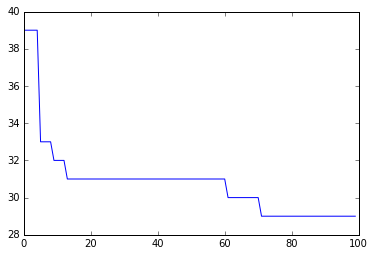

In [73]:
graph = {0: [5, 2, 8, 6, 4, 1], 1: [3, 9, 4, 7, 8, 0], 2: [6, 0, 3, 8, 7, 9],
         3: [8, 1, 7, 6, 9, 2], 4: [8, 9, 1, 7, 0], 5: [6, 0, 7, 9],
         6: [2, 5, 3, 8, 0, 7], 7: [3, 9, 1, 2, 5, 4, 6], 8: [3, 0, 4, 1, 6, 2, 9], 9: [1, 4, 7, 3, 2, 5, 8]}
infected = {3, 4, 7}
removed = set()
B = 16
edges = [(2, 6), (5, 6), (3, 8), (0, 5), (0, 2), (1, 3), (3, 7), (1, 9), (0, 8), (4, 8),
         (4, 9), (3, 6), (1, 4), (7, 9), (1, 7), (1, 8), (6, 8), (3, 9), (0, 6), (2, 3),
         (2, 8), (2, 7), (5, 7), (2, 9), (5, 9), (8, 9), (4, 7), (6, 7), (0, 4), (0, 1)]


def randomEdges(n, edges):
	if n <= len(edges):
		e = random.sample(edges, n)
	else:
		while n > len(edges):
			n -= 1
		e = random.sample(edges, n)

	return e #list


def susCounter(graph, infected):
	inf = list(infected)
	gf = list(graph)
	susReturn = 0

	for i in xrange(0, len(inf)):
		susReturn += len(graph[inf[i]])
		for j in xrange(0, len(graph[inf[i]])):
			checker = graph[inf[i]][j]
			susReturn += len(graph[checker])

	return susReturn

def fitness(graph, removed, infected):
	inpGraph = copy(list(graph.values()))
	inpRemoved = list(set(removed))
	inpInfected = list(infected)

	for x in inpRemoved:
		u , v = x
		inpGraph[u].pop(inpGraph[u].index(v))
		inpGraph[v].pop(inpGraph[v].index(u))

	sus = susCounter(inpGraph, inpInfected)

	for x in inpRemoved:
		u, v = x
		inpGraph[u].append(v)
		inpGraph[v].append(u)

	return sus

scoreList = [0 for i in range(len(edges))]

def scoredList(graph, removed, infected):
	score = fitness(graph, removed, infected)

	for e in removed:
		esm = edges.index(e)
		scoreList[esm] += score

	return

gBest = 0
gBestPath = []
particles = []
particleScore = []

for i in range(150):
	path = randomEdges(B, edges)
	particles.append(path)
	fit = fitness(graph, path, infected)
	particleScore.append(fit)

	if fit > gBest: # exchange with group best
		gBest = fit
		gBestPath = path

lenPart = len(particles)
vSize = 2
indSize = 2
cSize = 2
weightSum = vSize+indSize+cSize
stepSize = 1

probOfInd = float(indSize)/ weightSum
probOfCog = float(cSize)/ weightSum
probOfvolec = float(vSize) / weightSum

grpBest = []
for i in range(100):	
	for particle in range(lenPart):
		theLen = len(particles[particle])
		vPath = randomEdges(theLen,edges)

        sigleBestPath = random.sample(particles[particle], int(probOfInd*theLen*stepSize))
        grpBestPath = random.sample(gBestPath, int(probOfCog*theLen*stepSize))
        vlcBestPath = random.sample(vPath, int(probOfCog*theLen*stepSize))
        
        print("s", sigleBestPath)
        print("g", grpBestPath)
        print("v", vlcBestPath)
        
        sigleBestPath[len(sigleBestPath):] = grpBestPath
        sigleBestPath[len(sigleBestPath):] = vlcBestPath

        fromLastParticle = len(particles[particle]) - len(sigleBestPath)
        last = random.sample(particles[particle], fromLastParticle)
        
        sigleBestPath[len(sigleBestPath):] = last
        sigleBestPath = list(set(sigleBestPath))
        fromLastParticle = len(particles[particle]) - len(sigleBestPath)
        last = random.sample(particles[particle], fromLastParticle)
        sigleBestPath[len(sigleBestPath):] = last

        print(sigleBestPath)
        print('===================================================================')

        fitt = fitness(graph, sigleBestPath, infected)

        if fitt < particleScore[particle]: # better fitness
        	particleScore[particle] = fitt
        	particles[particle] = sigleBestPath

        if fitt < gBest:
        	gBest = fitt
        	gBestPath = sigleBestPath

        grpBest.append(gBest)

plt.plot(range(len(grpBest)),grpBest)
print(gBestPath, gBest)


The above shema shows the group best fitness which decreases as expected

compared to hill and SA this algorithm ends in a worse place that can be changed due to different c and r which is multiplyed by the fitnesses. but it will do a better job than the ants because it has a global best which all the members are notifyed by it.